In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-deaths-dataset/all_weekly_excess_deaths.csv
/kaggle/input/covid19-deaths-dataset/us-counties.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data=pd.read_csv('/kaggle/input/covid19-deaths-dataset/all_weekly_excess_deaths.csv')

In [4]:
data

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2020-01-01,2020-01-07,7,2020,1,25734100,2497,0.0,2463.111657,33.888343,2497.0,0.000000,0.131687,0.013758
1,Australia,Australia,0,2020-01-08,2020-01-14,7,2020,2,25734100,2510,0.0,2458.278324,51.721676,2510.0,0.000000,0.200985,0.021040
2,Australia,Australia,0,2020-01-15,2020-01-21,7,2020,3,25734100,2501,0.0,2436.444991,64.555009,2501.0,0.000000,0.250854,0.026496
3,Australia,Australia,0,2020-01-22,2020-01-28,7,2020,4,25734100,2597,0.0,2436.611657,160.388343,2597.0,0.000000,0.623252,0.065824
4,Australia,Australia,0,2020-01-29,2020-02-04,7,2020,5,25734100,2510,0.0,2425.944991,84.055009,2510.0,0.000000,0.326629,0.034648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11710,United States,United States,USA,2021-03-14,2021-03-20,7,2021,11,317812460,58076,7022.0,58898.357322,-822.357322,51054.0,2.209479,-0.258756,-0.013962
11711,United States,United States,USA,2021-03-21,2021-03-27,7,2021,12,317812460,57996,6938.0,58534.957322,-538.957322,51058.0,2.183048,-0.169583,-0.009207
11712,United States,United States,USA,2021-03-28,2021-04-03,7,2021,13,316020313,55007,9514.0,57810.357322,-2803.357322,45493.0,3.010566,-0.887081,-0.048492
11713,United States,United States,USA,2021-04-04,2021-04-10,7,2021,14,316020313,55265,6684.0,57736.557322,-2471.557322,48581.0,2.115054,-0.782088,-0.042807


## EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11715 entries, 0 to 11714
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   11715 non-null  object 
 1   region                    11715 non-null  object 
 2   region_code               11715 non-null  object 
 3   start_date                11715 non-null  object 
 4   end_date                  11715 non-null  object 
 5   days                      11715 non-null  int64  
 6   year                      11715 non-null  int64  
 7   week                      11715 non-null  int64  
 8   population                11715 non-null  int64  
 9   total_deaths              11715 non-null  int64  
 10  covid_deaths              11715 non-null  float64
 11  expected_deaths           11715 non-null  float64
 12  excess_deaths             11715 non-null  float64
 13  non_covid_deaths          11715 non-null  float64
 14  covid_

In [6]:
data.columns

Index(['country', 'region', 'region_code', 'start_date', 'end_date', 'days',
       'year', 'week', 'population', 'total_deaths', 'covid_deaths',
       'expected_deaths', 'excess_deaths', 'non_covid_deaths',
       'covid_deaths_per_100k', 'excess_deaths_per_100k',
       'excess_deaths_pct_change'],
      dtype='object')

In [7]:
data.isnull().sum()# no missing value found

country                     0
region                      0
region_code                 0
start_date                  0
end_date                    0
days                        0
year                        0
week                        0
population                  0
total_deaths                0
covid_deaths                0
expected_deaths             0
excess_deaths               0
non_covid_deaths            0
covid_deaths_per_100k       0
excess_deaths_per_100k      0
excess_deaths_pct_change    0
dtype: int64

In [8]:
data.describe()

,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
count,11715.000000,11715.000000,11715.000000,1.171500e+04,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000
mean,6.962441,2020.203927,23.115322,1.115783e+07,2160.281861,249.987751,1872.656236,287.625625,1910.294110,2.144536,2.290059,0.141454
std,0.423756,0.402932,15.789753,2.921175e+07,5860.294477,998.592679,4985.142151,1350.148074,5099.567164,3.341416,4.679702,0.298217
min,2.000000,2020.000000,1.000000,8.466700e+04,3.000000,-270.000000,2.000000,-6361.757322,-1723.000000,-8.803323,-16.019891,-0.823949
25%,7.000000,2020.000000,9.000000,1.359711e+06,279.000000,1.000000,257.175625,-5.531544,253.000000,0.047474,-0.257874,-0.015423
50%,7.000000,2020.000000,20.000000,4.648794e+06,883.000000,24.000000,814.000000,27.073081,805.000000,0.899928,1.141500,0.069270
75%,7.000000,2020.000000,37.000000,8.570146e+06,1624.000000,141.000000,1410.509583,147.225093,1421.500000,2.926926,3.372990,0.204734
max,7.000000,2021.000000,53.000000,3.283005e+08,86388.000000,23481.000000,63308.370990,27036.540028,70504.000000,63.283242,80.863108,6.350086


In [9]:
data['covid_death_percent']=data['covid_deaths']/data['total_deaths']*100
data['covid_death_rate(per_day)']=data['covid_deaths']/data['days']

In [10]:
data['country'].value_counts()

United States     3591
Spain             1420
Italy             1160
Chile             1056
Britain            980
France             966
Denmark             70
Peru                70
Estonia             70
Netherlands         70
South Africa        70
Belgium             69
Germany             69
Norway              69
Bulgaria            69
Lithuania           69
Switzerland         69
Austria             69
Sweden              68
New Zealand         68
Portugal            68
Latvia              68
Slovenia            68
Poland              67
Hungary             67
Finland             67
Colombia            67
Greece              66
Luxembourg          66
Czech Republic      65
Mexico              65
Croatia             65
Slovakia            65
Cyprus              65
Iceland             64
Malta               64
Israel              63
South Korea         62
Romania             60
Tunisia             58
Montenegro          57
Australia           57
Canada              54
Turkey     

## VISUALISATION

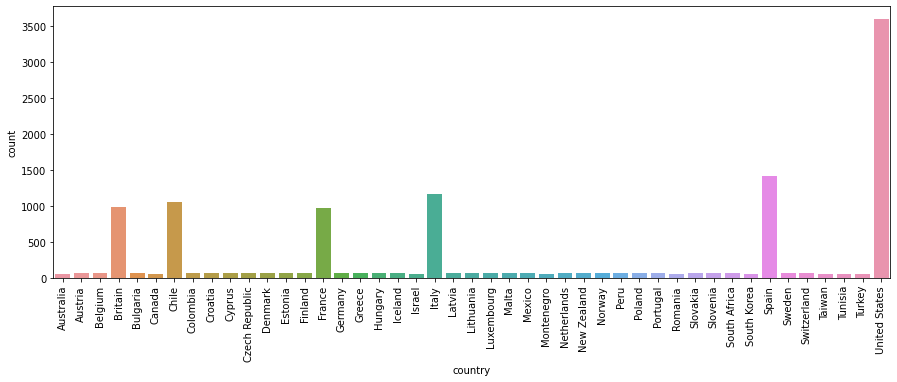

In [11]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=data,x='country',ax=ax)
plt.xticks(rotation=90)
plt.show()

#### we can see the total no. of country and their frequency

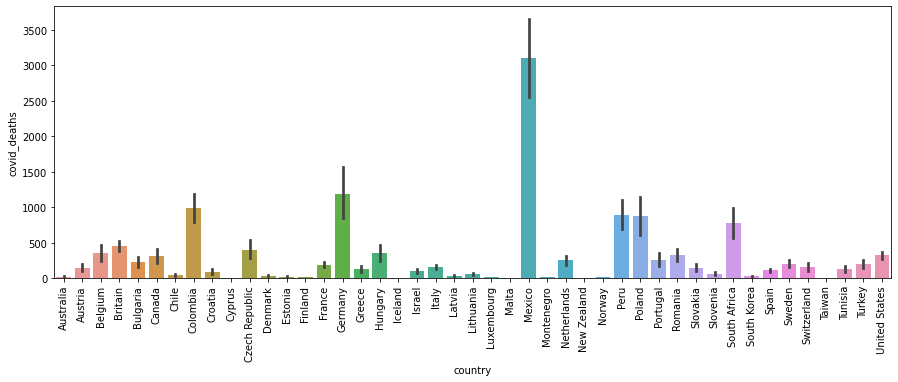

In [12]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.barplot(data=data,x='country',y='covid_deaths')
plt.xticks(rotation=90)
plt.show()

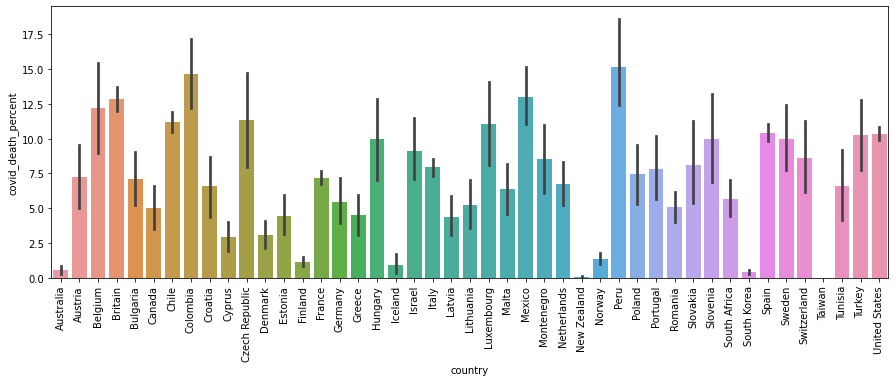

In [13]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.barplot(data=data,x='country',y='covid_death_percent')
plt.xticks(rotation=90)
plt.show()

#### we can see that MEXICO has the highest no of covid death and PERU has the highest % of covid death

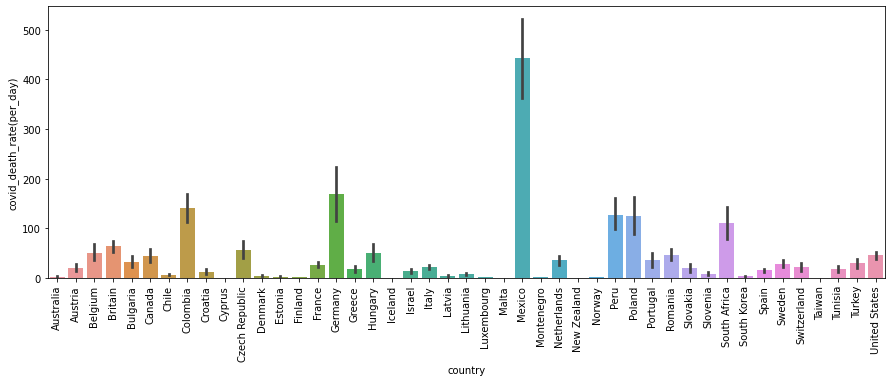

In [14]:
f,ax=plt.subplots(1,1,figsize=(15,5))
sns.barplot(data=data,x='country',y='covid_death_rate(per_day)')
plt.xticks(rotation=90)
plt.show()

#### MEXICO has highest covid growth death rate

In [15]:
fig=px.choropleth(data_frame=data,locations='country',locationmode='country names',color='covid_deaths'
                  ,animation_frame='end_date')
fig.show()

In [16]:
fig=px.choropleth(data_frame=data,locations='country',locationmode='country names',color='covid_death_percent'
                  ,animation_frame='end_date')
fig.show()